In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, ifft, fftshift, ifftshift

In [5]:
x = np.array([1,2,3,4,5,6,7])

In [6]:
fftshift(x)

array([5, 6, 7, 1, 2, 3, 4])

In [49]:
def diff_DFT(u, m):
    # Calculate the derivatives at Fourier nodes by DFT
    # u: function values at Fourier nodes
    # m: order of the derivatives
    
    N = len(u)
    
    if N%2 != 0:
        print('Please use even length')
        return
    
    # DFT
    # Note that here we do not rescale the result by 1/N
    # Correspondingly, when using ifft, we do not rescale, either.
    U = fft(u)
    
    # Rearrangement
    U = fftshift(U)
    
    # Adjustment
    if m%2 != 0:
        U[0] == 0
    
    # Wave numbers, k = -N/2, ..., N/2-1
    K = np.arange(-N//2, N//2)
    
    # Differentiation
    U_deri = (1j*K)**m * U
    U_deri = ifftshift(U_deri) # rearrangement again, very important
    u_deri = ifft(U_deri)
    u_deri = np.real(u_deri)
    
    return u_deri
    

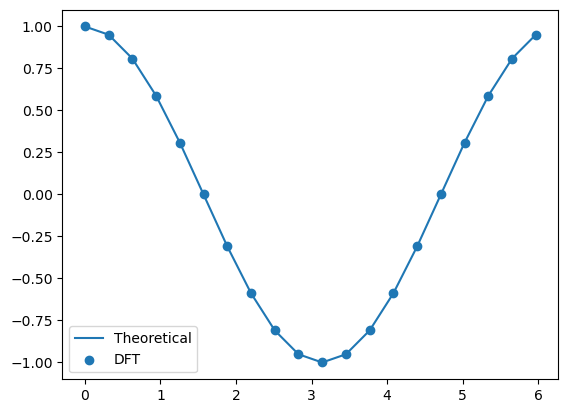

In [54]:
N = 20
J = np.arange(0, N)
x = 2 * np.pi / N * J
u = np.sin(x)
u_deri_th = np.cos(x)
u_deri_DFT = diff_DFT(u, m=1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, u_deri_th, label='Theoretical')
ax.scatter(x, u_deri_DFT, label='DFT')
ax.legend()

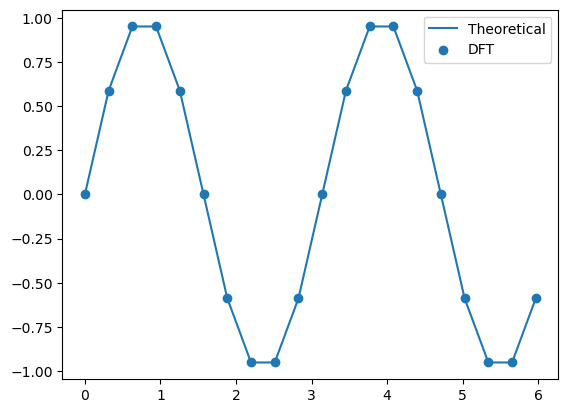

In [56]:
N = 20
J = np.arange(0, N)
x = 2 * np.pi / N * J
u = np.sin(x)**2
u_deri_th = 2 * np.sin(x) * np.cos(x)
u_deri_DFT = diff_DFT(u, m=1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, u_deri_th, label='Theoretical')
ax.scatter(x, u_deri_DFT, label='DFT')
ax.legend()